### 複数の説明変数を用いるロジスティック回帰

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Irisデータセットの読み込み
iris = sns.load_dataset('iris')

# matplotlib: 日本語フォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 
                               'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [2]:
# species が setosa のデータを除去
df = iris.query('species!="setosa"')

# ダミー変数化
df = pd.get_dummies(data=df, drop_first=True)

# 確認
df.iloc[[0, 50]]

,sepal_length,sepal_width,petal_length,petal_width,species_virginica
50,7.0,3.2,4.7,1.4,0
100,6.3,3.3,6.0,2.5,1


7_2_logistic.ipynb でのAUCの比較では、petal_length が単一の説明変数では最もAUCが高かった。<br>
petal_lengthと他の説明変数の組み合わせではどうなるかを比較する。

In [3]:
df.columns.drop('sepal_length')

Index(['sepal_width', 'petal_length', 'petal_width', 'species_virginica'], dtype='object')

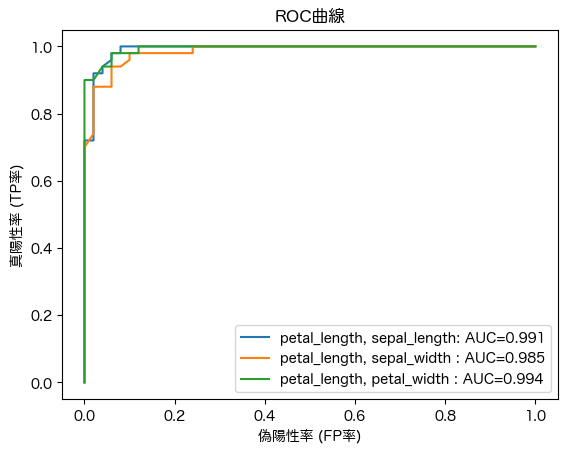

In [4]:
# ロジスティック回帰モデルを作成
model = LogisticRegression(C=10000.0)

# 固定する説明変数
x1_label = 'petal_length'

# dfの列名から x1_label と 'species_virginica' を除去し、それぞれについて、for ループ内を実行
for x2_label in df.columns.drop([x1_label, 'species_virginica']):
    # 説明変数、目的変数
    X = df[[x1_label, x2_label]]
    Y = df.species_virginica

    # ロジスティック回帰モデルを作成
    model.fit(X, Y)

    # ROC曲線, AUC
    Y_proba = model.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(Y, Y_proba[:, 1])
    plt.plot(fpr, tpr, label='{:12}, {:12}: AUC={:.3f}'.format(
        x1_label, x2_label, auc(fpr, tpr)))
    plt.legend()

plt.xlabel('偽陽性率 (FP率)')
plt.ylabel('真陽性率 (TP率)')
plt.title('ROC曲線')
plt.show()

### 決定境界

説明変数が2つの場合の分類の境界（決定境界）がどうなるかを、同じ組み合わせ（petal_lengthと他の説明変数の組み合わせ）で描画してみる。

In [12]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    決定境界の描画関数
    """
    # 1, 2列目の取得
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]

    # 散布図の描画
    sns.scatterplot(x=x1, y=x2, hue=y)

    # 刻み幅の指定
    step = 0.01
    # 描画範囲の拡大幅
    a = 0.5
    # 格子座標の作成
    x1_mesh, x2_mesh = np.meshgrid(np.arange(x1.min() - a, x1.max() + a, step),
                                   np.arange(x2.min() - a, x2.max() + a, step))
    # 格子の座標に対する予測値を計算
    Z = model.predict(pd.DataFrame(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T,
                                   columns=X.columns))
    # contourf: 領域の塗りつぶし
    # - alpha: 透過度
    # - cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html に記載
    plt.contourf(x1_mesh, x2_mesh, Z.reshape(x1_mesh.shape), alpha=0.3, cmap='coolwarm')
    plt.show()

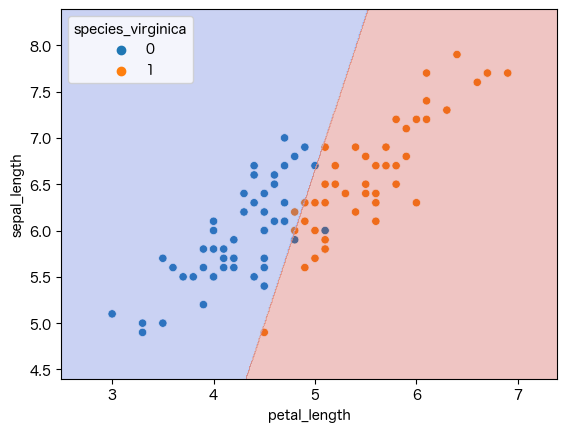

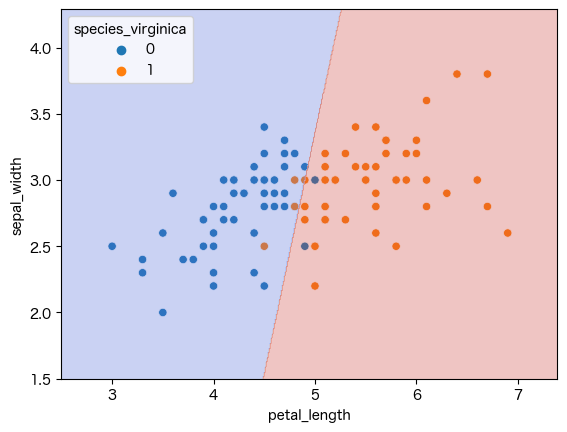

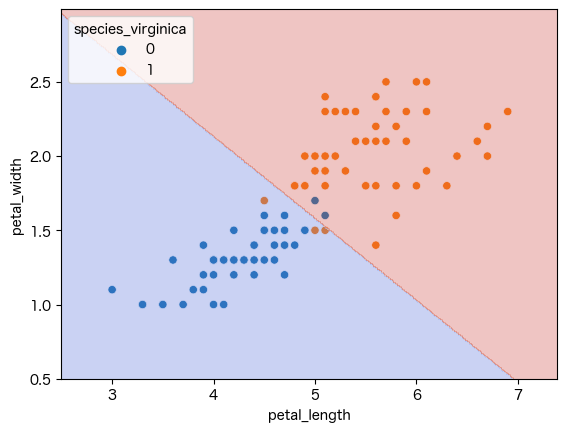

In [14]:
# ロジスティック回帰モデルを作成
model = LogisticRegression(C=10000.0)

# 固定する説明変数
x1_label = 'petal_length'

# dfの列名から x1_label と 'species_virginica' を除去し、それぞれについて、for ループ内を実行
for x2_label in df.columns.drop([x1_label, 'species_virginica']):
    # 説明変数、目的変数
    X = df[[x1_label, x2_label]]
    Y = df.species_virginica

    # ロジスティック回帰モデルを作成
    model.fit(X, Y)

    # 決定境界の描画
    plot_decision_boundary(model, X, Y)

### 決定境界 (2)

境界を確率で描画。

In [7]:
def plot_decision_boundary(model, X, y):
    """
    決定境界の描画関数
    """
    # 1, 2列目の取得
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]

    # 散布図の描画
    sns.scatterplot(x=x1, y=x2, hue=y)

    # 刻み幅の指定
    step = 0.01
    # 描画範囲の拡大幅
    a = 0.5
    # 格子座標の作成
    x1_mesh, x2_mesh = np.meshgrid(np.arange(x1.min() - a, x1.max() + a, step),
                                   np.arange(x2.min() - a, x2.max() + a, step))
    # 格子の座標に対する予測値（確率）を計算
    # - 0になる確率, 1になる確率の両方が返されるので、1になる確率の方だけを用いる
    Z = model.predict_proba(pd.DataFrame(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T,
                                   columns=X.columns))[:,1]
    # contourf: 領域の塗りつぶし
    # - alpha: 透過度
    # - cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html に記載
    plt.contourf(x1_mesh, x2_mesh, Z.reshape(x1_mesh.shape), alpha=0.3, cmap='coolwarm')
    plt.show()

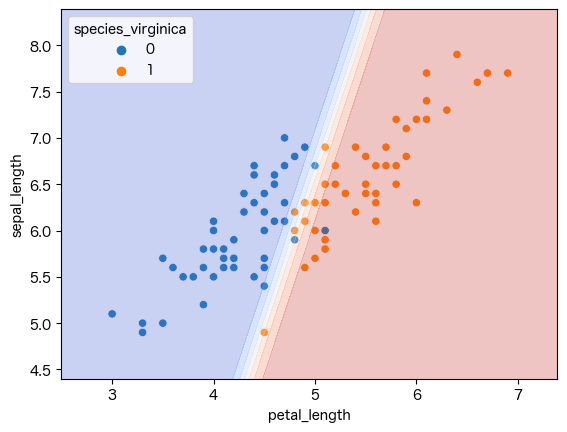

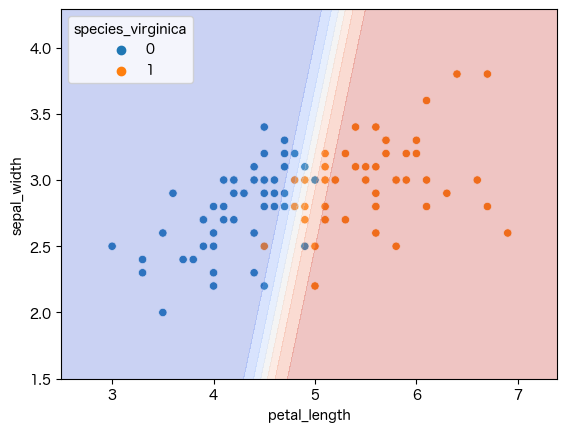

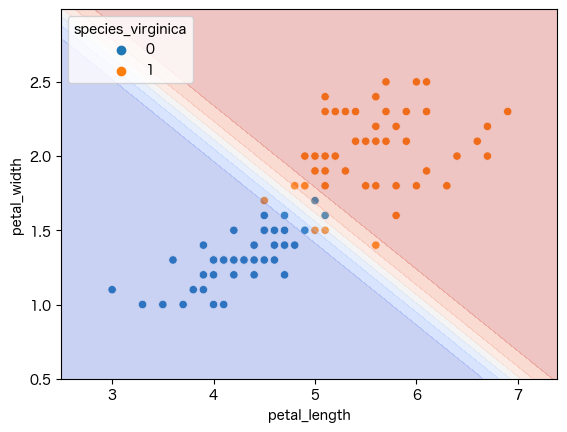

In [8]:
# ロジスティック回帰モデルを作成
model = LogisticRegression(C=10000.0)

# 固定する説明変数
x1_label = 'petal_length'

# dfの列名から x1_label と 'species_virginica' を除去し、それぞれについて、for ループ内を実行
for x2_label in df.columns.drop([x1_label, 'species_virginica']):
    # 説明変数、目的変数
    X = df[[x1_label, x2_label]]
    Y = df.species_virginica

    # ロジスティック回帰モデルを作成
    model.fit(X, Y)

    # 決定境界の描画
    plot_decision_boundary(model, X, Y)

### 決定境界 (3)

境界の確率を3次元で描画。

In [9]:
def plot_decision_boundary_3d(model, X, y):
    """
    決定境界の描画関数（3次元）
    """
    # 1, 2列目の取得
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]

    # 散布図の描画
    #sns.scatterplot(x=x1, y=x2, hue=y)

    # 刻み幅の指定
    step = 0.01
    # 描画範囲の拡大幅
    a = 0.5
    # 格子座標の作成
    x1_mesh, x2_mesh = np.meshgrid(np.arange(x1.min() - a, x1.max() + a, step),
                                   np.arange(x2.min() - a, x2.max() + a, step))
    # 格子の座標に対する予測値（確率）を計算
    # - 0になる確率, 1になる確率の両方が返されるので、1になる確率の方だけを用いる
    Z = model.predict_proba(pd.DataFrame(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T,
                                   columns=X.columns))[:,1]
    # 描画領域を大きめに設定
    plt.figure(figsize=(8,8))
    # 3次元座標系の設定 projection='3d'
    ax = plt.subplot(projection='3d')
    # 散布図
    ax.scatter(x1, x2, y)
    # 決定境界
    ax.plot_surface(x1_mesh, x2_mesh, Z.reshape(x1_mesh.shape), cmap='seismic', alpha=0.2)
    plt.show()

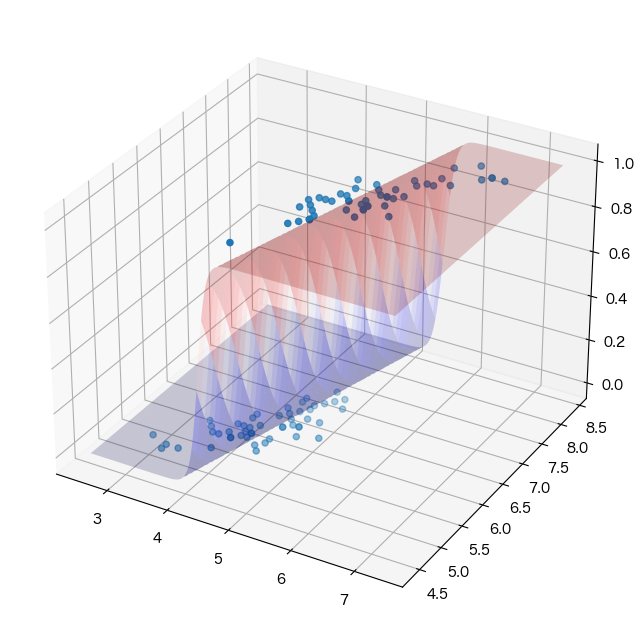

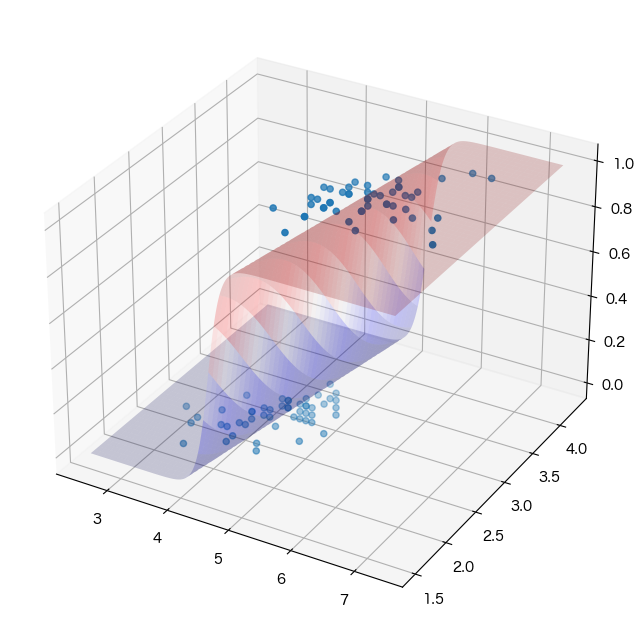

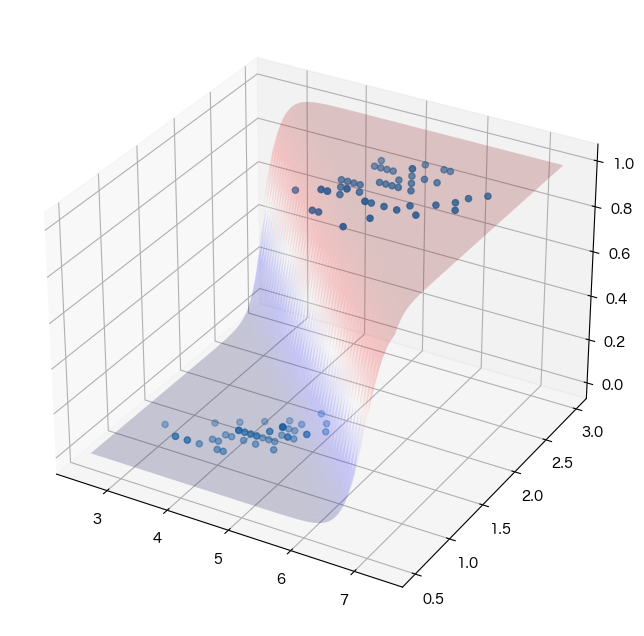

In [10]:
# ロジスティック回帰モデルを作成
model = LogisticRegression(C=10000.0)

# 固定する説明変数
x1_label = 'petal_length'

# dfの列名から x1_label と 'species_virginica' を除去し、それぞれについて、for ループ内を実行
for x2_label in df.columns.drop([x1_label, 'species_virginica']):
    # 説明変数、目的変数
    X = df[[x1_label, x2_label]]
    Y = df.species_virginica

    # ロジスティック回帰モデルを作成
    model.fit(X, Y)

    # 決定境界の描画
    plot_decision_boundary_3d(model, X, Y)